3024 4032
(2000, 2) 2000


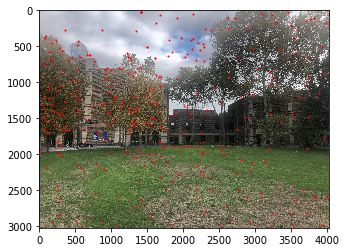

In [8]:
'''
  File name: corner_detector.py
  Author:
  Date created:
'''
import numpy as np
from anms import anms
from scipy import signal
'''
  File clarification:
    Detects corner features in an image. You can probably find free “harris” corner detector on-line, 
    and you are allowed to use them.
    - Input img: H × W matrix representing the gray scale input image.
    - Output cimg: H × W matrix representing the corner metric matrix.
'''
from skimage.feature import corner_harris
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

def corner_detector(img):
  # Your Code Here
  f1 = np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
  f2 =  np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  Magx = signal.convolve2d(img,f1,mode='same')
  Magy = signal.convolve2d(img,f2,mode='same')
  cimg=(Magx+Magy)/(1+Magx+Magy)
  return cimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_1 = np.array(Image.open("middle.jpg"))
img_1 = mpimg.imread("middle.jpg")
img = rgb2gray(img_1)
corner = corner_detector(img)
result = anms(corner,300)

fig, ax = plt.subplots()
ax.imshow(img_1)
ax.plot(result[0], result[1], color='r', marker='o',
        linestyle='None', markersize=1)
plt.show()

# fig, axes = plt.subplots(1, 2)
# ax = axes.ravel()
# ax[0].imshow(img)
# ax[0].set_title('Original')

# ax[1].imshow(img)
# ax[1].autoscale(False)
# ax[1].plot(result[0], result[1], 'r.')
# ax[1].set_title('Peak local max')

# plt.show()
